<a href="https://colab.research.google.com/github/heigleyj/csc425_assignments/blob/master/L04_Shelling_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L04: Implementing the Shelling Model](https://docs.google.com/document/d/1NtGAKnsfwLRYMYrL74aMVMtTuQRJ1oDjvSFWlmMjpzs/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: Josh Heigley

**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

My design did not change very much from what we made on the teamwork, although I did have to add a few new methods that we didn't account for previously. I do not think that the underlying logic of this assignment was very difficult, and for me the hardest part was figuring out how to display the model effectively. I am very happy with the results, although I would have liked to have gotten the animation to work, but could not get it to do so. I spent approximately eight hours on this assignment but I enjoyed it quite a bit.

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

I did not collaborate with anyone for this assignment.

**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

The biggest challenge for me was figuring out how to display the graphics, as I was not very experience with that aspect. Originally, I tried using tkinter, but quickly discovered that window displays do not work on Colab, so then I had to research different methods and eventually decided to use the matplotlib library by mimicking what was done in the cellular automata in the textbook.

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

I did not make any major innovatinos to the assignment.

**TESTING**: Describe how you tested this work.

I tested this work through play testing and test suites with print statements that I could check too see if they were consistant with what they should be.

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

The biggest deficiency is that the program can run endlessly under certain conditions because it is only set to stop when all cells are happy. This is compounded by the fact that the program prints an image of the graph on the screen for every step so it can quickly get extremely large.

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab.

I think this was my favorite lab so far. It was not overly difficult and I liked that there was much more freedom as we were writing the code from scratch, so it felt more like my own project, and was more satisfying to see the results. I would have liked to have worked on it outside of colab so I could have given it a GUI but otherwise I am happy with it.

## Import Libraries

In [106]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
import math
from urllib.request import urlopen
import random
import pygame

## The Schelling Model

Enter the size of the square grid, measured by number of cells.
This should be an integer from 1 to 100

100


Enter the percentage of population that should be red. The remainder will be blue.
This should be an integer from 0 to 100

50


Enter the percentage of the grid that should be empty.
This should be an integer from 0 to 100

5


Enter the percentage of neighbors that should be like a cell for it to be happy.
This should be an integer from 0 to 100

50



Initial segregation: 0.75 %



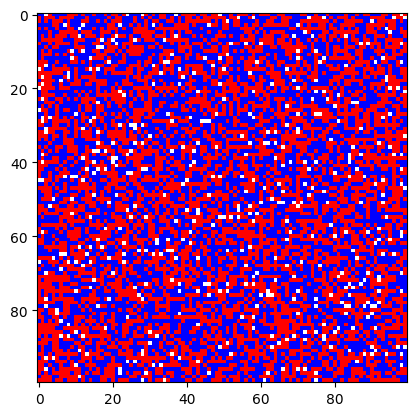

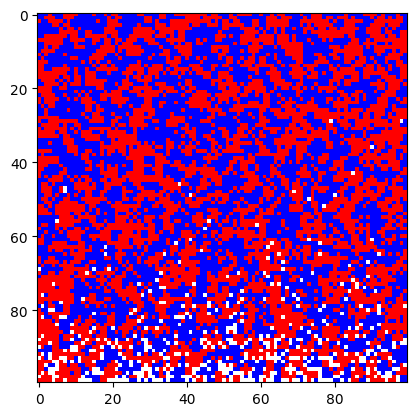

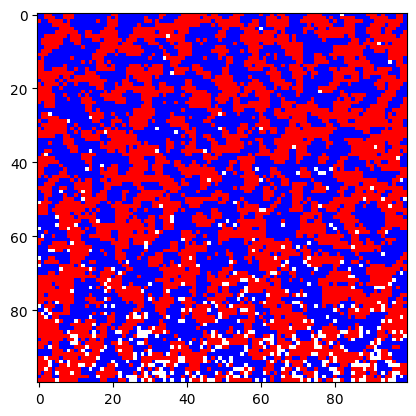

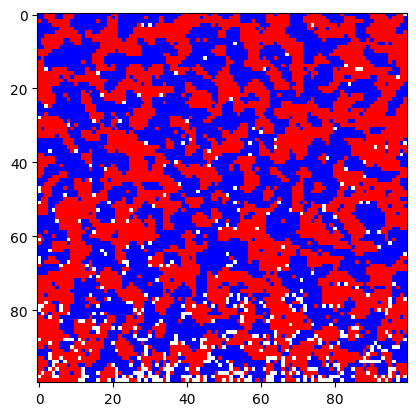

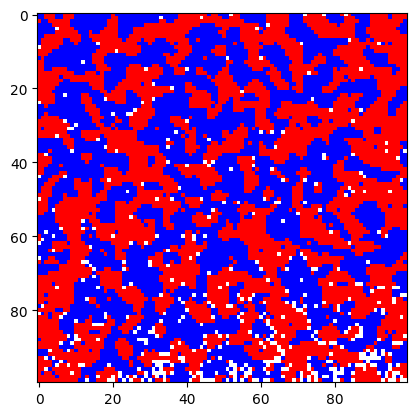

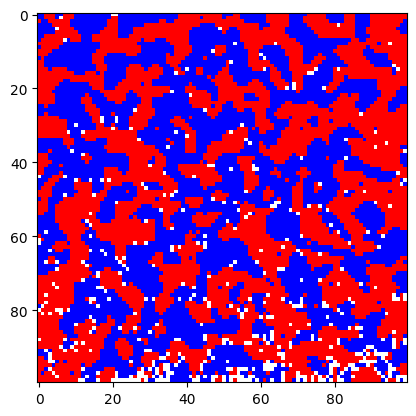

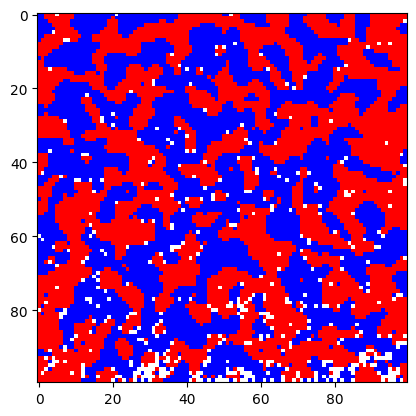

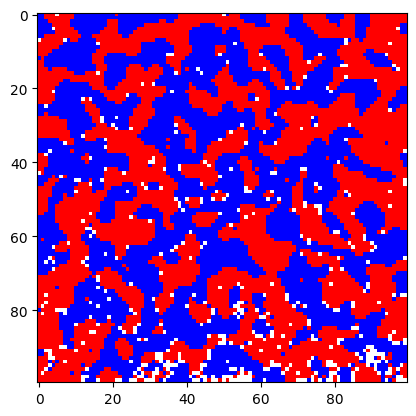

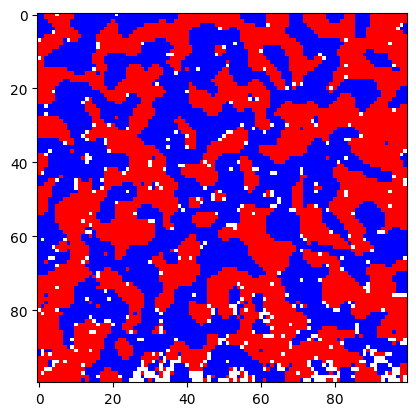

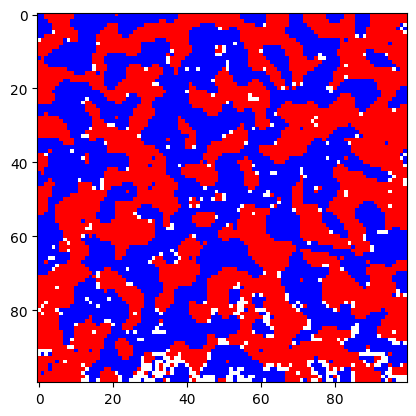

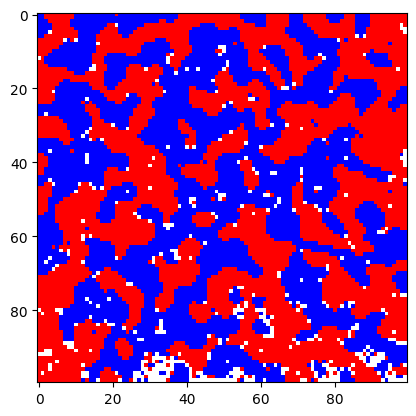

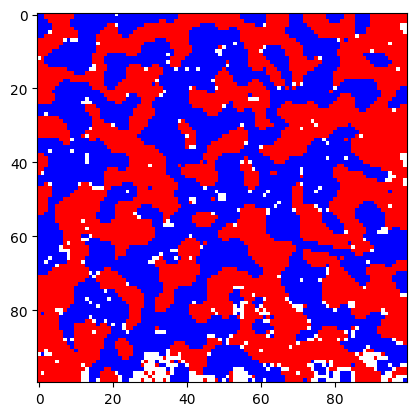

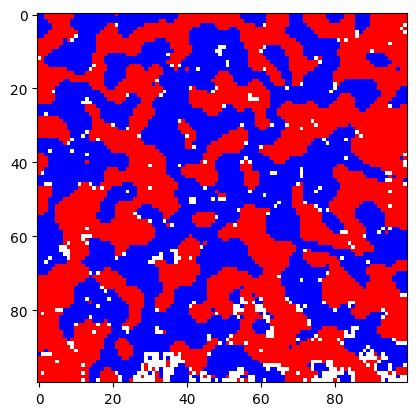

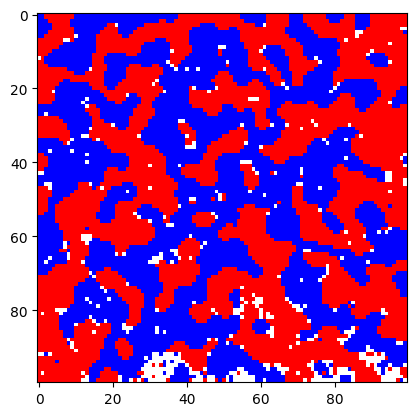

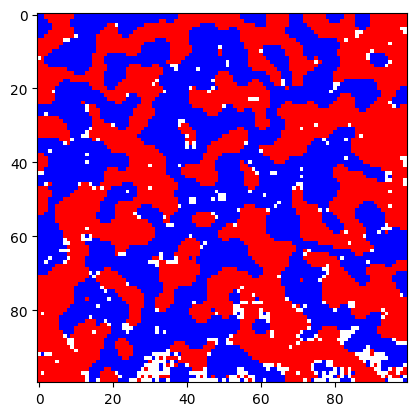

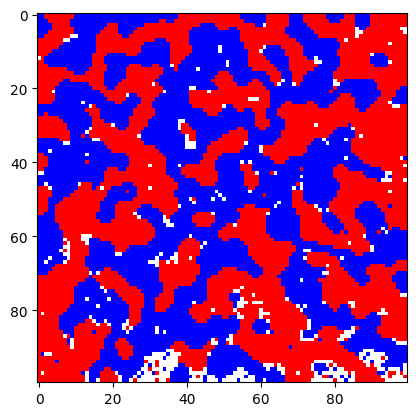

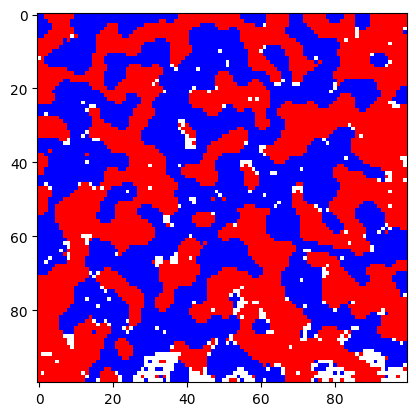

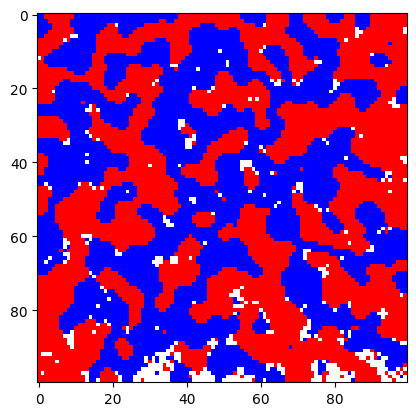

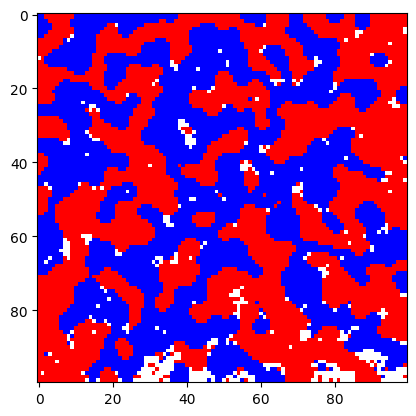

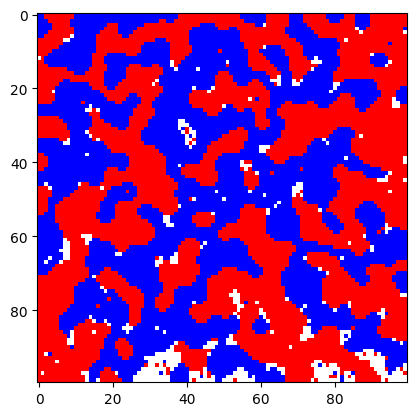

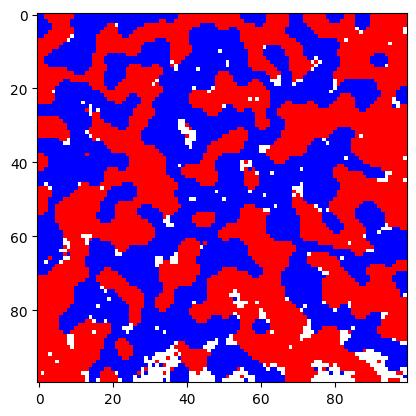

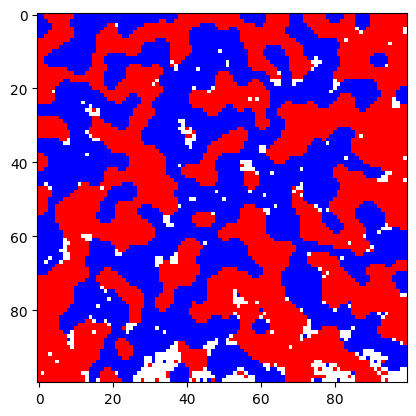

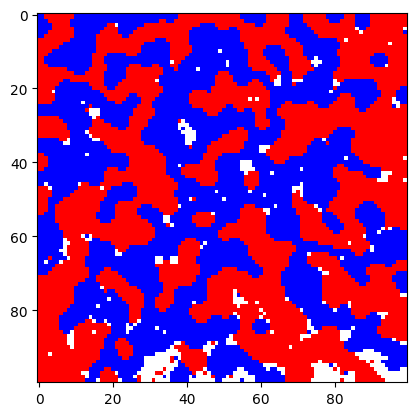

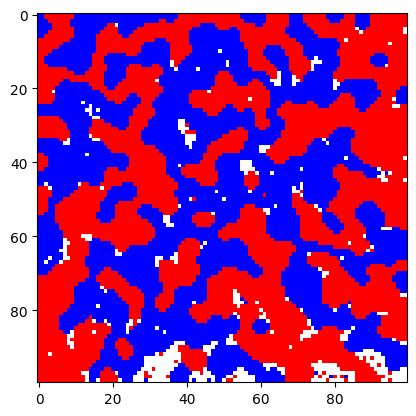

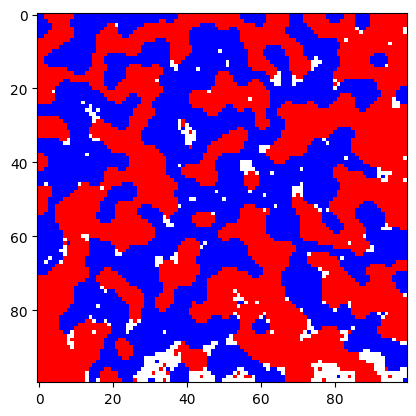

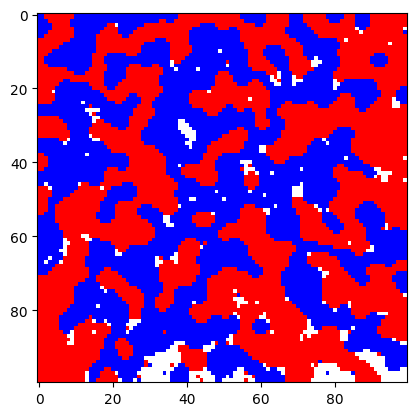

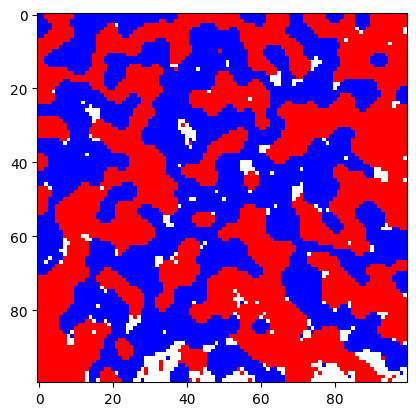

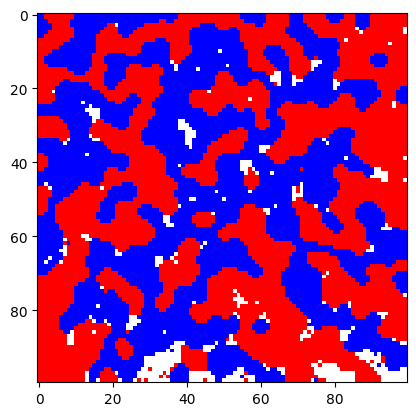

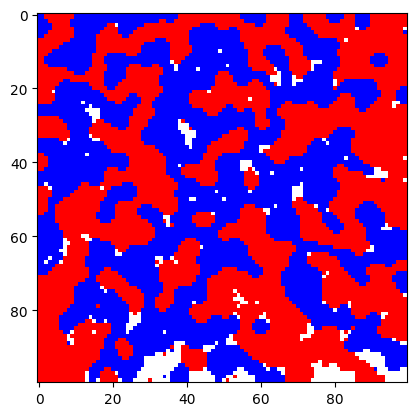

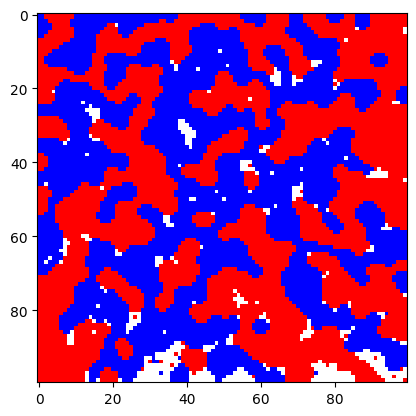

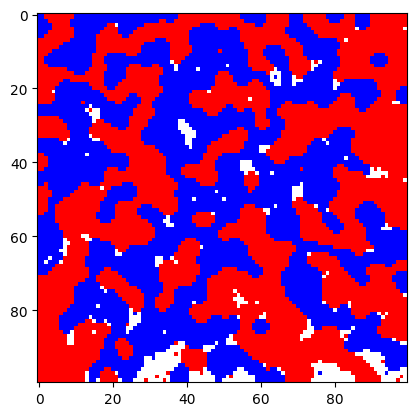

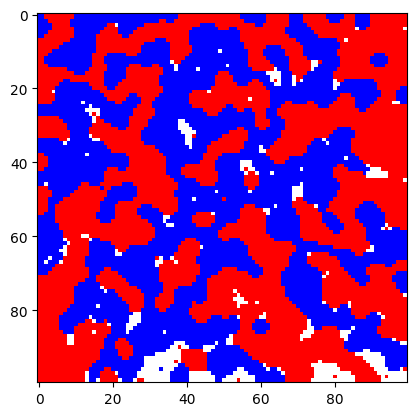

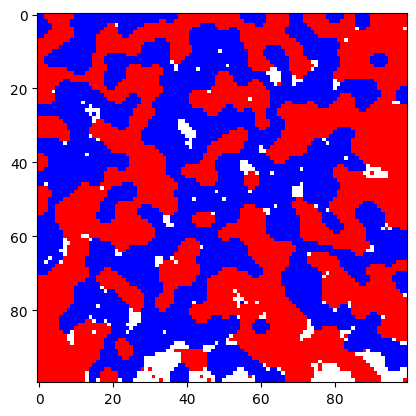

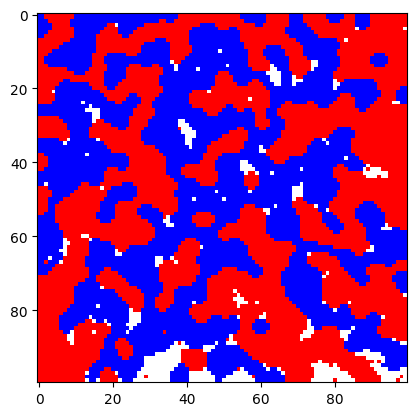

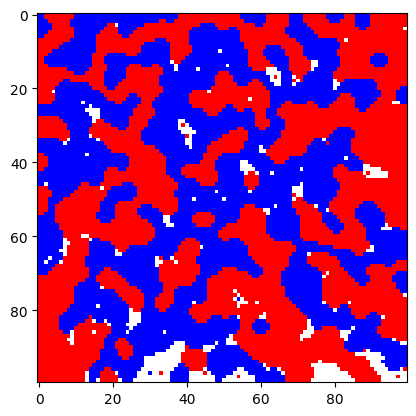

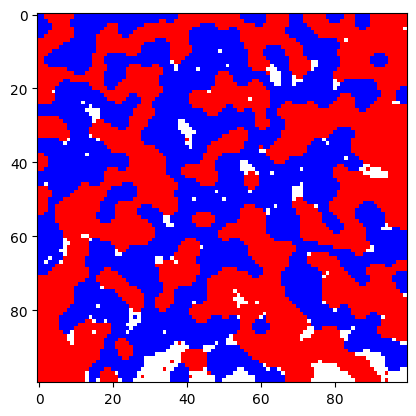

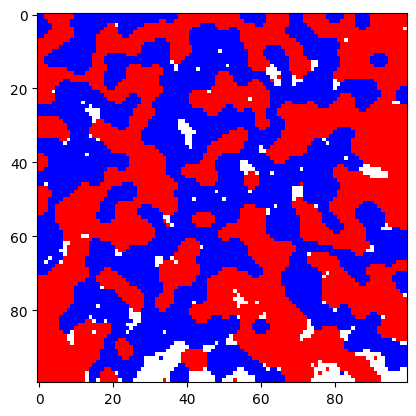

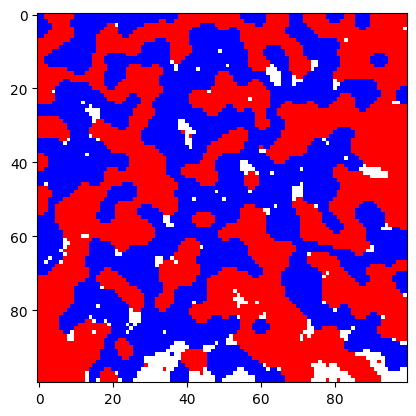

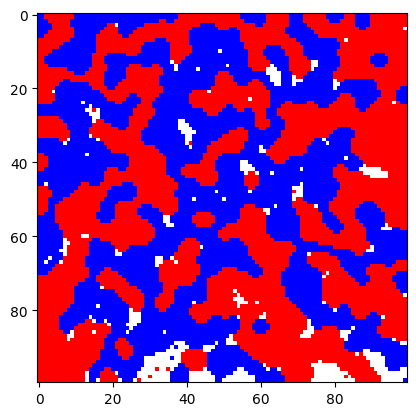

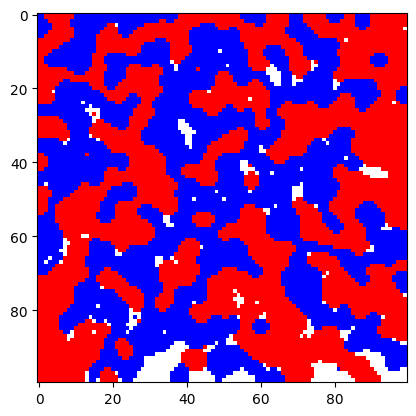

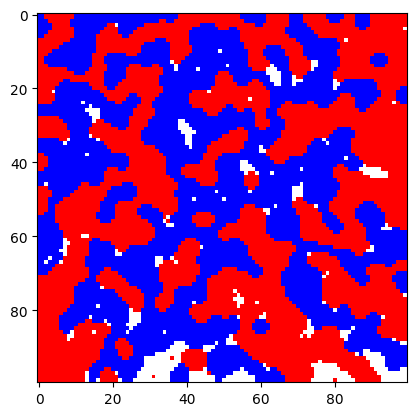

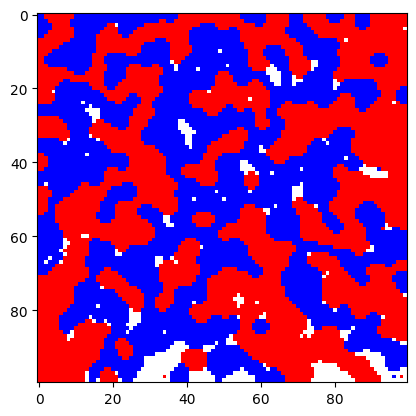

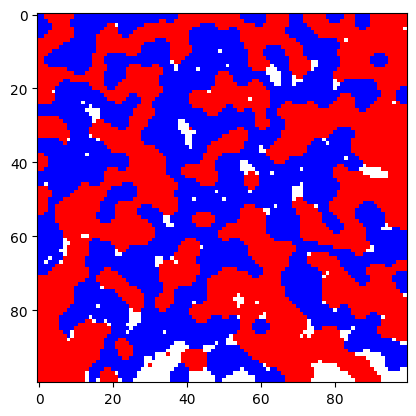

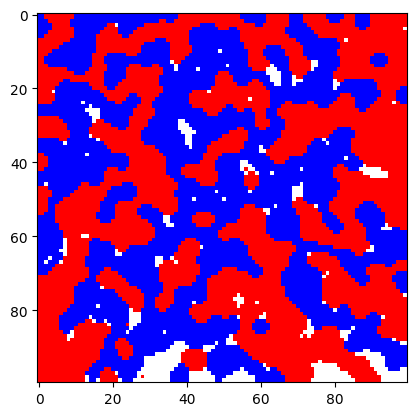

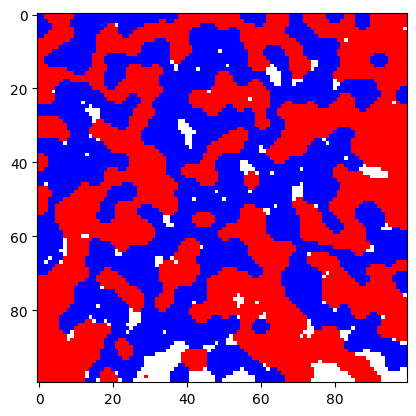

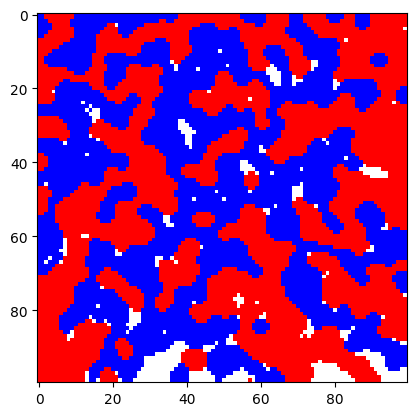

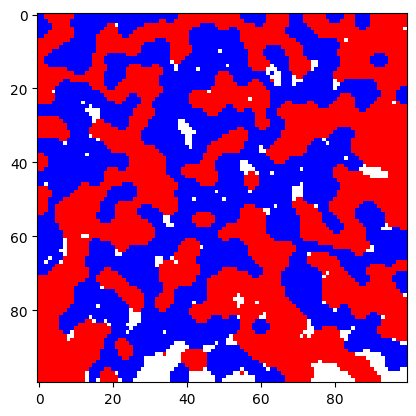

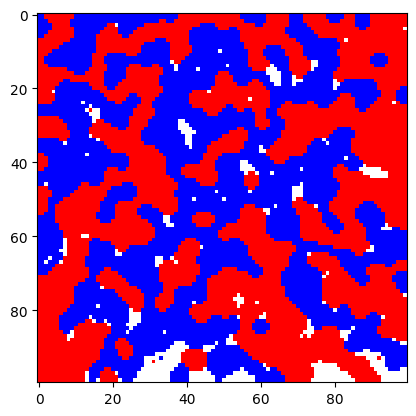

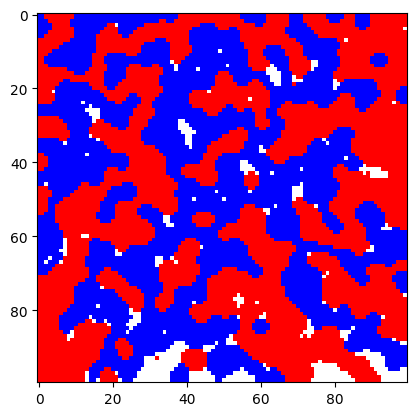

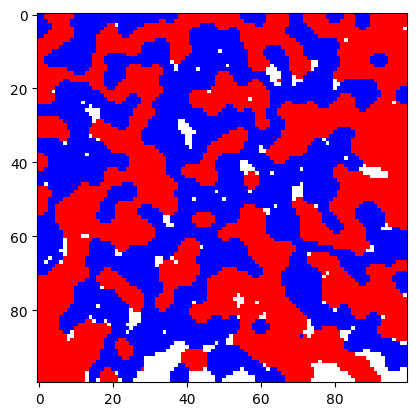

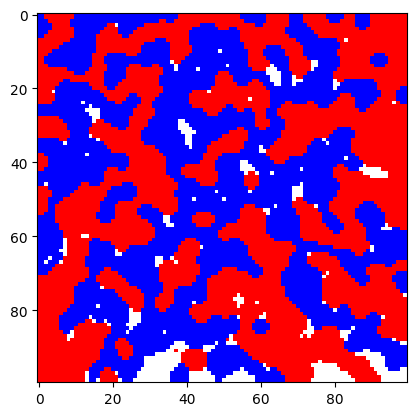

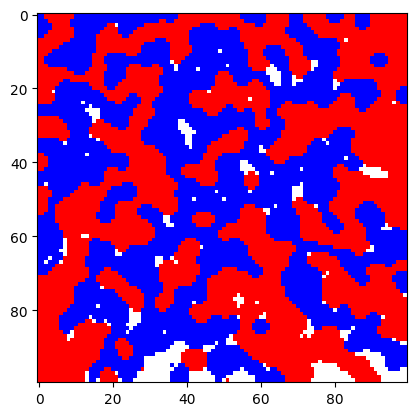

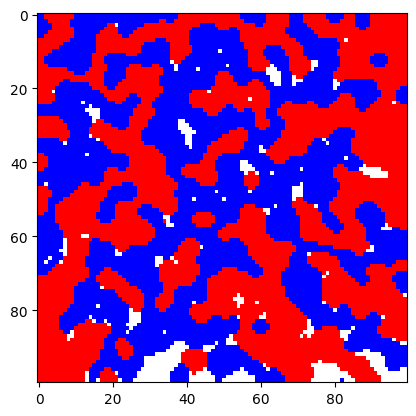

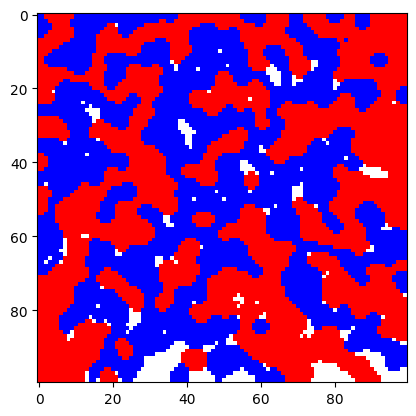

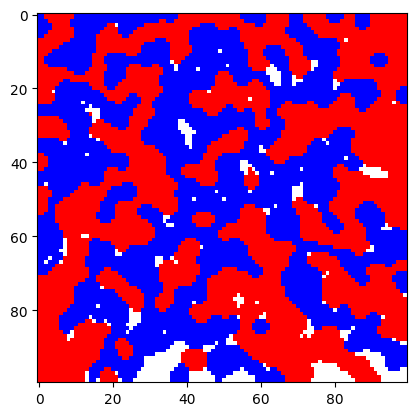


Initial Conditions:
Grid Size: 100
Red Proportion: 0.5
Blue Proportion: 0.5
Empty Proportion: 0.05
Threshold: 0.5

Initial segregation: 0.75 %

Final segregation: 63.42 %

Number of moves: 13927


In [112]:
"""
A 2D cellular automaton that simulates the progression of segregation based on a threshold of how many neighbors need to be like a certain cell for them to be happy and not move
"""
class Schelling():
  def __init__(self, red_proportion, blue_proportion, empty_proportion, grid_size, threshold):
    self.red_proportion = red_proportion
    self.blue_proportion = blue_proportion
    self.empty_proportion = empty_proportion
    self.grid_size = grid_size
    self.threshold = threshold
    self.grid = self.create_grid()
    self.unhappy_cells = []
    self.empty_cells = []
    self.get_cell_lists()
    self.segregation = self.determine_segregation()
    self.move_count = 0

  def create_grid(self) -> list:
    """
    Initializes and then populates the grid that represents the world for this 2D CA
    Returns the grid as an array
    """
    grid = [[0 for i in range(self.grid_size)] for j in range(self.grid_size)]
    #print('\n'.join(str(row) for row in grid))

    for row in range(self.grid_size):
      for column in range(self.grid_size):
        grid[row][column] = self.determine_cell()

    #print("Initial Grid:")
    #print('\n'.join(str(row) for row in grid))
    return grid

  def determine_cell(self) -> str:
    """
    Uses the random method to determine a value between 0-1 and then uses the proportions given to assign the color of the cell
    """
    outcome = random.random()
    cell = 0  # empty, None

    if self.red_proportion + self.blue_proportion != 1:
      raise ValueError("Proportions are not equivalent")
    if (self.red_proportion < 0 or self.red_proportion > 1 or
    self.blue_proportion < 0 or self.blue_proportion > 1 or
    self.empty_proportion < 0 or self.empty_proportion > 1):
      raise ValueError("Proportion out of bounds")

    if outcome <= self.red_proportion - self.empty_proportion/2:
      cell = 1  # 'red'
    elif outcome <= self.red_proportion + self.blue_proportion - self.empty_proportion:
      cell = 2  # 'blue'

    return cell

  def is_happy(self, row, column, segregation= False) -> bool:
    """
    Determines if a given cell is happy based on the given threshold
    """
    similar_neighbors = 0
    total_neighbors = 0
    offsets = []
    different_neighbors = 0

    if not self.grid[row][column]:
      print("Cell is empty")
      return None

    # Add offsets for neighbors above the cell
    if row > 0:
      offsets.append([-1,0])
      if column > 0:
        offsets.append([-1,-1])
      if column < self.grid_size - 1:
        offsets.append([-1,1])

    # Add offsets for neighbors beside the cell
    if column > 0:
      offsets.append([0,-1])
    if column < self.grid_size - 1:
      offsets.append([0,1])

    # Add offsets for neighbors below the cell
    if row < self.grid_size - 1:
      offsets.append([1,0])
      if column > 0:
        offsets.append([1,-1])
      if column < self.grid_size -1:
        offsets.append([1,1])

    # Tally up all neighbors and similar neighbors
    for vertical, horizontal in offsets:
      if self.grid[row + vertical][column + horizontal] == self.grid[row][column]:
        similar_neighbors += 1
      total_neighbors += 1
      if self.grid[row + vertical][column + horizontal] and self.grid[row + vertical][column + horizontal] != self.grid[row][column]:
        different_neighbors += 1

    if segregation:
      return different_neighbors == 0

    if total_neighbors > 0:
      return similar_neighbors/total_neighbors >= self.threshold
    else:
      return 0 == self.threshold

  def get_cell_lists(self) -> bool:
    """
    Generates the lists of empty cells and unhappy cells
    Returns a bool that is true if there are unhappy cells in the grid
    """
    unhappy = []
    empty = []

    # Iterate through every cell in the grid
    for row in range(self.grid_size):
      for column in range(self.grid_size):
        if not self.grid[row][column]:    # Cell is empty
          empty.append([row,column])
        elif not self.is_happy(row, column):  # Cell is unhappy
          unhappy.append([row,column])

    self.unhappy_cells = unhappy
    self.empty_cells = empty

    return len(unhappy) > 0

  def relocate_cells(self) -> None:
      """
      Relocates all unhappy cells to a random empty cell
      """
      for cell in self.unhappy_cells:
        new_location = self.empty_cells[random.randrange(len(self.empty_cells))]  # Get the new location randomly from the list of empty cells
        self.empty_cells.remove(new_location)                                   # Remove the new location from the list of empty cells

        self.grid[new_location[0]][new_location[1]] = self.grid[cell[0]][cell[1]]   # Set the new location to the value in the old location
        self.grid[cell[0]][cell[1]] = 0                                          # Set the original location in the grid to empty

        self.empty_cells.append(cell)                    # Add the old location to the list of empty cells

        self.move_count += 1

      return

  def determine_segregation(self) -> int:
      """
      Determines the level of segregation in the current grid
      """
      segregated_count = 0

      real_threshold = self.threshold
      self.threshold = 1

      for row in range(self.grid_size):
        for column in range(self.grid_size):
          if self.grid[row][column]:
            if self.is_happy(row,column, True):
              segregated_count += 1

      self.threshold = real_threshold

      #print(segregated_count, self.grid_size**2, len(self.empty_cells))
      if len(self.empty_cells) < self.grid_size**2:
        return segregated_count/(self.grid_size**2 - len(self.empty_cells))
      else:
        return 0



def main():
  print("Enter the size of the square grid, measured by number of cells.\nThis should be an integer from 1 to 100\n")
  size = int(input())
  print('\n')

  print("Enter the percentage of population that should be red. The remainder will be blue.\nThis should be an integer from 0 to 100\n")
  red = int(input())/100
  print('\n')

  print("Enter the percentage of the grid that should be empty.\nThis should be an integer from 0 to 100\n")
  unoccupied = int(input())/100
  print('\n')

  print("Enter the percentage of neighbors that should be like a cell for it to be happy.\nThis should be an integer from 0 to 100\n")
  move_threshold = int(input())/100
  print('\n')

  seg_model = Schelling(red, 1 - red, unoccupied, size, move_threshold)

  initial_grid = seg_model.grid
  initial_segregation = seg_model.segregation

  print("\nInitial segregation:", round(initial_segregation*100, 2),"%\n")

  # Define a custom colormap
  colors = ['white', 'red', 'blue']  # White for 0, Red for 1, Blue for 2
  cmap = mcolors.ListedColormap(colors)

  while seg_model.get_cell_lists():
    plt.clf()
    plt.imshow(seg_model.grid, cmap=cmap)
    plt.pause(0.001)
    seg_model.relocate_cells()
    seg_model.segregation = seg_model.determine_segregation()


  print("\nInitial Conditions:")
  print("Grid Size:", seg_model.grid_size)
  print("Red Proportion:", red)
  print("Blue Proportion:", 1-red)
  print("Empty Proportion:", unoccupied)
  print("Threshold:", move_threshold)

  print("\nInitial segregation:", round(initial_segregation*100, 2),"%\n")

  print("Final segregation:", round(seg_model.segregation*100, 2),"%\n")
  print("Number of moves:", seg_model.move_count)

main()

## Integrity statement

Please briefly describe all references you used, all help you received and all help you gave to others in completing this assignment. Be sure to say that you got no help if you got none.

I used the matplotlib documentation as well as the colab files in the textbook for help with the depictions of the grid. I did not work with anyone in completing this assignment.